In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x = tf.random.uniform((1000,5))
y = tf.random.uniform((1000,2))

print('X örnek: ', x[:1])
print('\n')
print('Y örnek: ', y[:1])

X örnek:  tf.Tensor([[0.78326905 0.08247876 0.17194021 0.6128247  0.36104274]], shape=(1, 5), dtype=float32)


Y örnek:  tf.Tensor([[0.9671804 0.8732004]], shape=(1, 2), dtype=float32)


In [3]:
sequential_model = tf.keras.models.Sequential([
                  Dense(256, activation = tf.nn.relu, input_dim = 5),
                  Dense(128, activation= tf.nn.relu),
                  Dense(2)                             
])

In [4]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.MeanSquaredError()
metric = tf.keras.metrics.MeanSquaredError()
sequential_model.compile(optimizer = optimizer,
                         loss = loss,
                         metrics = metric)

In [5]:
sequential_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 34,690
Trainable params: 34,690
Non-trainable params: 0
_________________________________________________________________


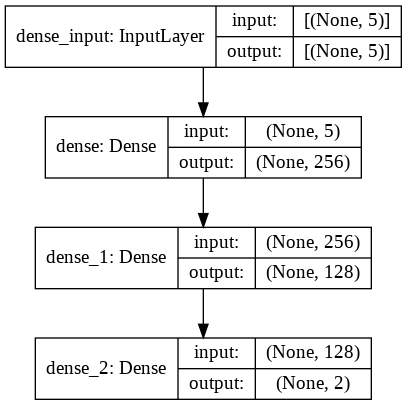

In [6]:
tf.keras.utils.plot_model(sequential_model, 'sequential_model.png', 
                          show_shapes=True)

In [7]:
sequential_model.fit(x,y, epochs = 8, validation_split=0.2)

Epoch 1/8
25/25 [==============================] - 1s 19ms/step - loss: 0.1873 - mean_squared_error: 0.1873 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 2/8
25/25 [==============================] - 0s 3ms/step - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.0876 - val_mean_squared_error: 0.0876
Epoch 3/8
25/25 [==============================] - 0s 3ms/step - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 4/8
25/25 [==============================] - 0s 3ms/step - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.0858 - val_mean_squared_error: 0.0858
Epoch 5/8
25/25 [==============================] - 0s 3ms/step - loss: 0.0888 - mean_squared_error: 0.0888 - val_loss: 0.0866 - val_mean_squared_error: 0.0866
Epoch 6/8
25/25 [==============================] - 0s 3ms/step - loss: 0.0868 - mean_squared_error: 0.0868 - val_loss: 0.0858 - val_mean_squared_error: 0.0858
Epoch 7/8
25/25 [============================

In [8]:
input1 = tf.keras.Input(shape=(5,), name="input_1")
x = Dense(128, activation = tf.nn.relu)(input1)
x = Dense(64, activation = tf.nn.relu)(x)
block_1 = Dense(32, activation=tf.nn.relu)(x)

input2 = tf.keras.Input(shape=(5,), name="input_2")
x = Dense(128, activation = tf.nn.relu)(input2)
x = Dense(64, activation = tf.nn.relu)(x)
block_2 = Dense(32, activation=tf.nn.relu)(x)

block_1_2_ekle = tf.keras.layers.add([block_2, block_1])

x = Dense(64, activation = tf.nn.relu)(block_1_2_ekle)
output1 = Dense(1, name = 'output_1')(x)
output2 = Dense(1, name = 'output_2')(x)

functional_model = tf.keras.Model(inputs = [input1, input2], outputs = [output1, output2])
functional_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 128)          768         input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          768         input_1[0][0]                    
______________________________________________________________________________________________

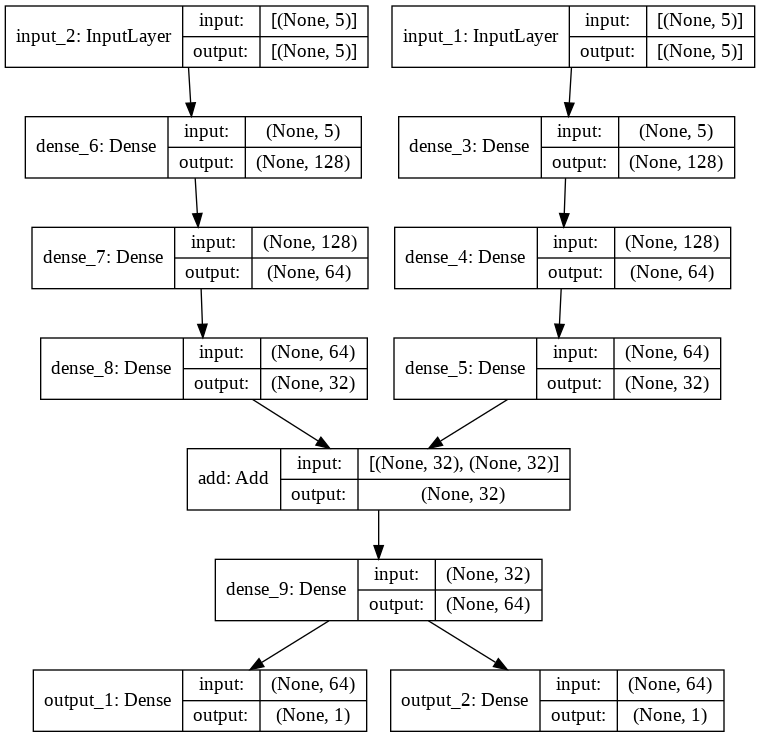

In [9]:
tf.keras.utils.plot_model(functional_model, 'func_model.png', 
                          show_shapes=True)

In [10]:
functional_model

In [11]:
sequential_model

In [12]:
losses = {'output_1' : tf.keras.losses.MeanSquaredError(),
          'output_2' : tf.keras.losses.MeanAbsoluteError()}
functional_model.compile(optimizer = optimizer, loss = losses, metrics=['mape'])

In [13]:
x1 = tf.random.uniform((1000,5))
y1 = tf.random.uniform((1000,1))

x2 = tf.random.uniform((1000,5))
y2 = tf.random.uniform((1000,1))

In [14]:
train_data = {'input_1' : x1,
              'input_2' : x2}
              
labels = {'output_1' : y1,
          'output_2' : y2}              

In [15]:
functional_model.fit(x=train_data, y = labels, epochs=8, verbose=1)

Epoch 1/8
32/32 [==============================] - 1s 2ms/step - loss: 0.6084 - output_1_loss: 0.2572 - output_2_loss: 0.3512 - output_1_mape: 167.2909 - output_2_mape: 175.8957
Epoch 2/8
32/32 [==============================] - 0s 2ms/step - loss: 0.3284 - output_1_loss: 0.0840 - output_2_loss: 0.2444 - output_1_mape: 200.3119 - output_2_mape: 186.3857
Epoch 3/8
32/32 [==============================] - 0s 2ms/step - loss: 0.3369 - output_1_loss: 0.0841 - output_2_loss: 0.2527 - output_1_mape: 210.8794 - output_2_mape: 380.4349
Epoch 4/8
32/32 [==============================] - 0s 2ms/step - loss: 0.3342 - output_1_loss: 0.0833 - output_2_loss: 0.2509 - output_1_mape: 188.9747 - output_2_mape: 246.9187
Epoch 5/8
32/32 [==============================] - 0s 2ms/step - loss: 0.3182 - output_1_loss: 0.0801 - output_2_loss: 0.2381 - output_1_mape: 254.3008 - output_2_mape: 208.6385
Epoch 6/8
32/32 [==============================] - 0s 2ms/step - loss: 0.3184 - output_1_loss: 0.0801 - output